In [1]:
import pandas as pd

df = pd.read_csv('c:/users/pavan/downloads/cerealspga05.csv')

df.head(5)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
3,Cracklin'_Oat_Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
4,Post_Nat._Raisin_Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594


In [2]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,105.540541,2.500000,0.945946,160.675676,2.090541,14.594595,6.770270,92.675676,28.378378,2.175676,1.027432,0.818243,42.879265
std,18.442201,1.088546,0.963610,85.188447,2.404002,4.349205,4.467684,70.578065,22.787104,0.833512,0.151260,0.234914,14.280511
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,131.250000,0.250000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.449210
50%,110.000000,2.000000,1.000000,180.000000,1.500000,14.000000,6.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.424490
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,10.750000,113.750000,25.000000,3.000000,1.000000,1.000000,51.401243
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


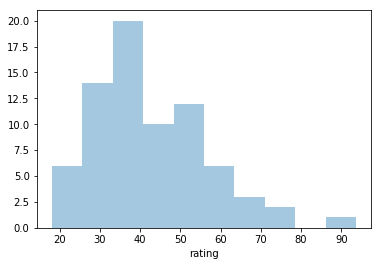

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(df.rating.dropna(), kde=False, bins = 10);

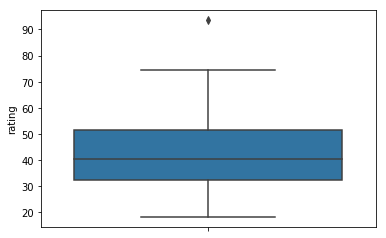

In [7]:
sns.boxplot(df.rating, orient = 'v', showfliers=True)

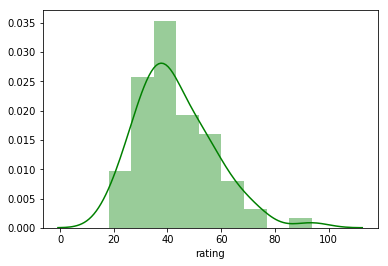

In [13]:
df.rating = df.rating.infer_objects()
sns.distplot(df.rating.dropna(), color="g");

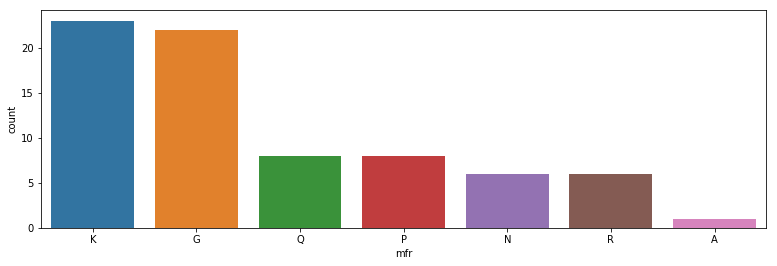

In [16]:
plt.figure(figsize=(13, 4))
#http://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot for odering
sns.countplot(df.mfr.dropna(), order = df.mfr.value_counts().index);

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1        70        4    1     260    9.0    7.0       5     320        25   
2        50        4    0     140   14.0    8.0       0     330        25   
3       110        3    3     140    4.0   10.0       7     160        25   
4       120        3    1     200    6.0   11.0      14     260        25   

      rating  
0  68.402973  
1  59.425505  
2  93.704912  
3  40.448772  
4  37.840594  


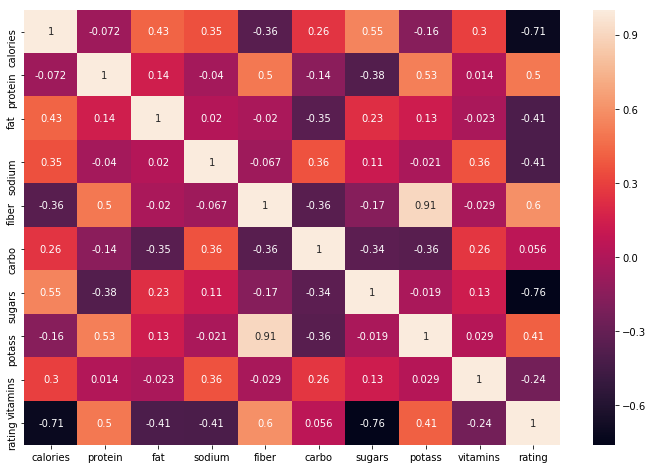

In [35]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 8))

df = df.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(df.head())

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);


<Figure size 1008x1008 with 0 Axes>

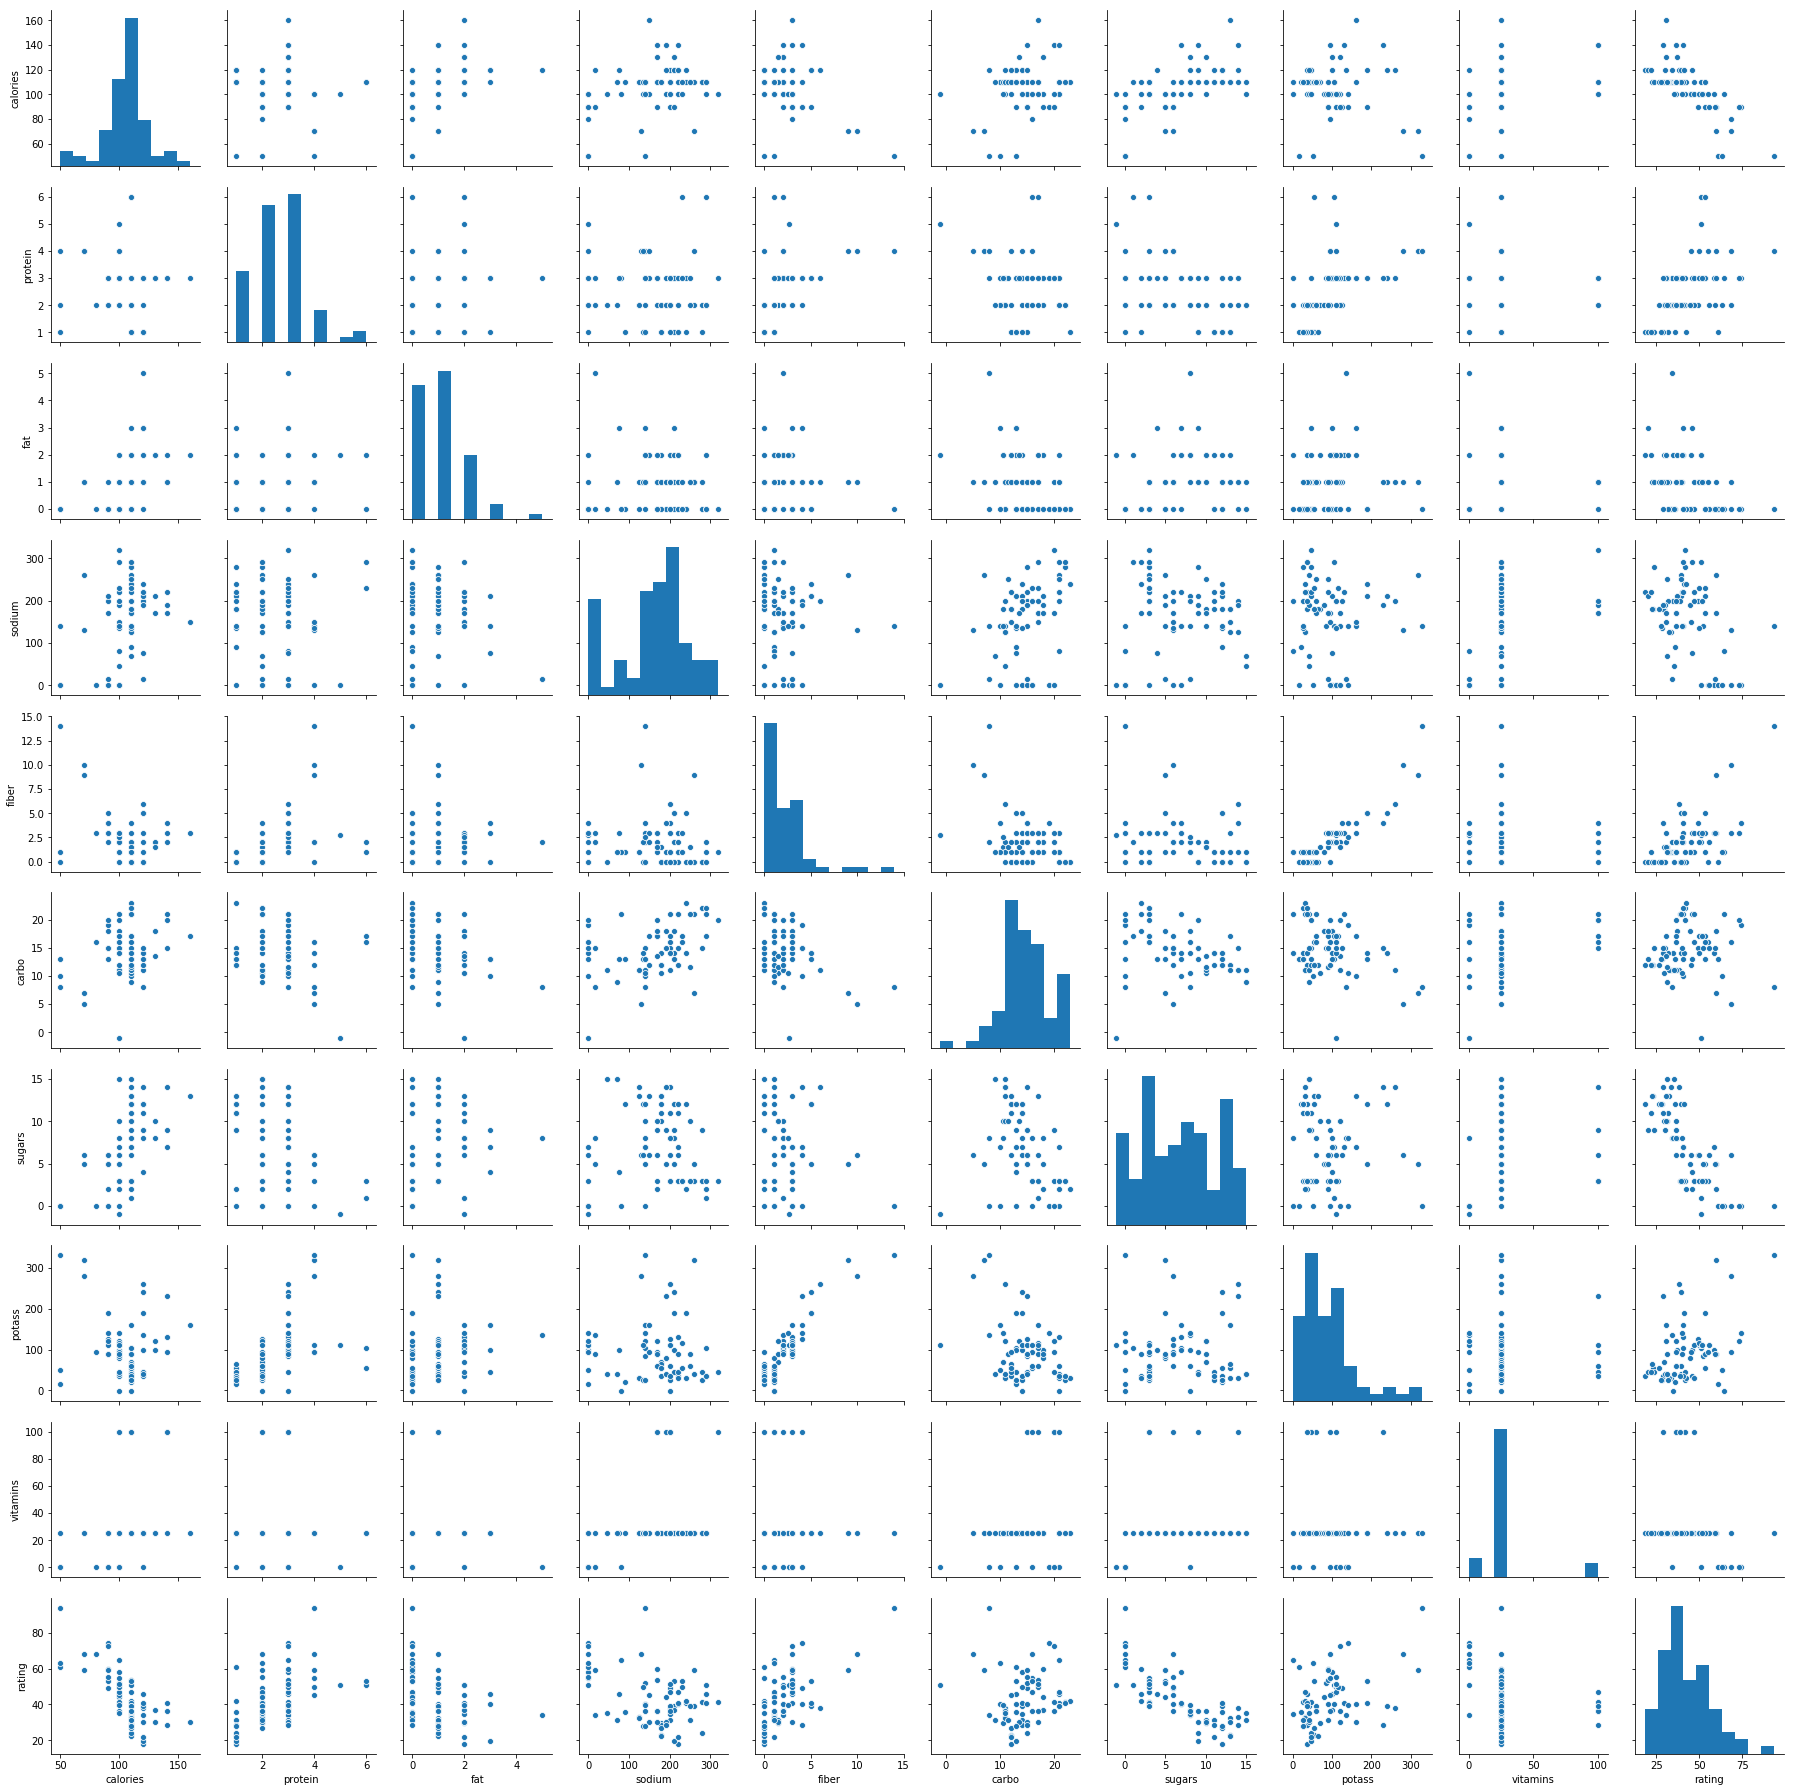

In [36]:
plt.figure(figsize=(14, 14))

#Crossplots
sns.pairplot(df);
#, diag_kind='kde'

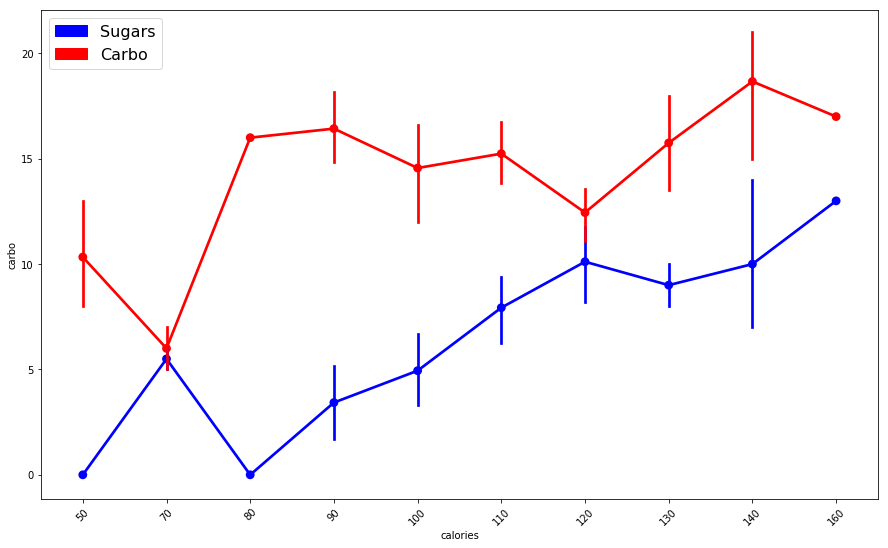

In [37]:
#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = df.calories, y = df.sugars, color = 'blue', label='cal Vs Sugars')
ax = sns.pointplot(x = df.calories, y = df.carbo, color = 'red', label='Cal vs Carbo')

blue_patch = mpatches.Patch(color='blue', label='Sugars')
red_patch = mpatches.Patch(color='red', label='Carbo')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);


In [49]:
from scipy import stats

female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]
stats.ttest_1samp(female_doctor_bps, 120)

Ttest_1sampResult(statistic=4.512403659336718, pvalue=0.00023838063630967753)

In [50]:
ratingsV = df['rating']
# One sample T-test
stats.ttest_1samp(ratingsV, 55)

Ttest_1sampResult(statistic=-7.301314890396322, pvalue=2.8668822611898395e-10)

In [51]:

# Two-sample T-test

ratingsV1 = df['rating']
ratingsV2 = df['calories']

stats.ttest_ind(ratingsV1, ratingsV2)

Ttest_indResult(statistic=-23.109820870238558, pvalue=1.236893029730037e-50)

In [52]:
# Paired T-Test

control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

stats.ttest_rel(control, treatment)

Ttest_relResult(statistic=-3.6244859951782136, pvalue=0.0055329408161001415)

In [53]:

stats.ttest_rel(ratingsV1, ratingsV2)

Ttest_relResult(statistic=-17.780016505781415, pvalue=3.0580689742510997e-28)

In [54]:
#The t distribution is symmetric about zero, so there's really nothing to interpret about the sign of the test statistic. 
#If the p-value is small enough, you have a significant difference, and otherwise you don't.

#Positive values reflect a sample mean larger than your hypothesized mean,
#negative values reflect a sample mean smaller than your hypothesized mean.
#That's the reason for the signs.

In [55]:
#Analysis of Variance (ANOVA)
#ANOVA is used to compare the means of three or more samples.

In [56]:
ctrl = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]

trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]

trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]


stats.f_oneway(ctrl, trt1, trt2)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

In [57]:
ratingsV1 = df['rating']
ratingsV2 = df['calories']
ratingsV3 = df['carbo']

stats.f_oneway(ratingsV1, ratingsV2, ratingsV2)

F_onewayResult(statistic=328.623091393745, pvalue=1.1509815151445373e-66)

In [58]:
# https://people.richland.edu/james/lecture/m170/ch13-2wy.html


In [60]:
#researchpy
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
    
# Gettin summary statistics
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


In [68]:
df.head(15)
# libido =  Desire

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [61]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


In [62]:
stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

In [63]:
#The F-statistic= 5.119 and the p-value= 0.025 which is indicating that there is an overall significant effect of medication 
#on libido.
#However, we don’t know where the difference between dosing/groups is yet. 

In [64]:
# ANOVA with statsmodels

results = ols('libido ~ C(dose)', data=df).fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Sun, 23 Jun 2019   Prob (F-statistic):             0.0247
Time:                        00:19:29   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


In [66]:
results.diagn

{'jb': 1.1080275776425255,
 'jbpv': 0.574638696944554,
 'skew': 0.19458085550134002,
 'kurtosis': 1.726659006032749,
 'omni': 2.517358660775963,
 'omnipv': 0.2840288872319991,
 'condno': 3.7320508075688776,
 'mineigval': 1.3397459621556134}

These are the same diagnostics from the bottom of the regression table from before. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

In [70]:
#Assumption: Homogeneity of Variance
stats.levene(df['libido'][df['dose'] == 'placebo'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

Levene’s test for homogeneity of variance is not significant which indicates that the groups have equal variances.

In [71]:
#Assumption: Normality
stats.shapiro(results.resid)

(0.9166916012763977, 0.17146942019462585)

The results from the Shapiro-Wilk test is not statistically significant which indicates that the residuals are normally distributed.

In [72]:
# TukeyHSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
 high    low     -1.8   -4.1651  0.5651 False 
 high  placebo   -2.8   -5.1651 -0.4349  True 
 low   placebo   -1.0   -3.3651  1.3651 False 
----------------------------------------------


In [74]:
df = pd.read_csv('c:/users/pavan/downloads/cerealspga05.csv')



# TukeyHSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( df['rating'], df['mfr']) # order Important
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  A      G    -20.3651 -57.1269 16.3968 False 
  A      K    -10.8125 -47.5396 25.9147 False 
  A      N    13.1177  -25.7169 51.9522 False 
  A      P    -13.0466 -51.1814 25.0882 False 
  A      Q    -11.9349 -50.0697 26.1999 False 
  A      R    -11.3397 -50.1743 27.4949 False 
  G      K     9.5526  -1.1694  20.2746 False 
  G      N    33.4827  16.9236  50.0418  True 
  G      P     7.3185  -7.5255  22.1624 False 
  G      Q     8.4301  -6.4138  23.2741 False 
  G      R     9.0254  -7.5337  25.5845 False 
  K      N    23.9301   7.4483  40.4119  True 
  K      P    -2.2341  -16.9918 12.5235 False 
  K      Q    -1.1225  -15.8801 13.6352 False 
  K      R    -0.5272  -17.009  15.9546 False 
  N      P    -26.1642 -45.5815  -6.747  True 
  N      Q    -25.0526 -44.4699 -5.6353  True 
  N      R    -24.4573 -45.2153 -3.6994  True 
  P      

In [75]:
results = ols('rating ~ C(mfr)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     6.566
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           1.73e-05
Time:                        00:37:28   Log-Likelihood:                -284.14
No. Observations:                  74   AIC:                             582.3
Df Residuals:                      67   BIC:                             598.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      54.8509     11.829      4.637      0.000      31.241      78.461
C(mfr)[T.G]   -20.3651     12.095     -1.684      0.097     -44.506       3.776
C(mfr)[T.K]   -10.8125     12.083     -0.895      0.374     -34.930      13.306
C(mfr)[T.N]    13.1177     12.776      1.027      0.308     -12.384      38.620
C(mfr)[T.P]   -13.0466     12.546     -1.040      0.302     -38.089      11.996
C(mfr)[T.Q]   -11.9349     12.546     -0.951      0.345     -36.977      13.107
C(mfr)[T.R]   -11.3397     12.776     -0.888      0.378     -36.842      14.162
==============================================================================
Omnibus:                       23.744   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.470
Skew:                           1.057   Prob(JB):                     6.66e-12
Kurtosis:                       6.496   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(mfr),5512.602343,6.0,6.566468,0.000017
Residual,9374.505523,67.0,NaN,NaN


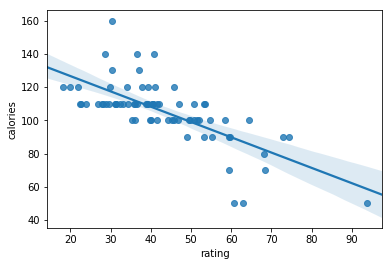

In [89]:
# Reg plot

sns.regplot(x=df['rating'], y=df['calories'], data=df);

In [90]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
3,Cracklin'_Oat_Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772
4,Post_Nat._Raisin_Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594


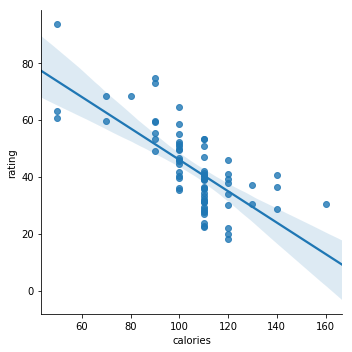

In [92]:
sns.lmplot(x="calories", y="rating",  data=df);